In [20]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [21]:
data_display = pd.read_csv("dataset2.csv")

print(data_display)

     WL1(mm)  WL2(mm)  WL3(mm)  WL4 (mm)  WL5 (mm)  Solar (W/m2)  \
0        124      324       50        38        56           678   
1        123      322       50        38        56           550   
2        123      322       50        38        56            71   
3        132      330       54        38        56            22   
4        130      333       55        38        57             0   
..       ...      ...      ...       ...       ...           ...   
714       37       41       40        36        44             0   
715       37       40       39        36        44             0   
716       37       40       39        36        44             0   
717       37       41       40        36        44             0   
718       37       41       40        36        44             0   

     WindSpeed (m/s)  AirTemp (DegC)  RH (%)  (delta)PD (mm)  
0               1.48            25.6      64            -1.0  
1               1.40            25.2      66            -

In [22]:
learning_rate = 0.001
trainning_steps = 15000
display_step = 1000

w_pred = 0

In [23]:
data = np.loadtxt("dataset2_np.csv", delimiter = ',', dtype = np.float32)

x_train = data[:500, :9]
x_test = data[500:, :9]

y_train = data[:500, [-1]]
y_test = data[500:, [-1]]

w = tf.Variable(tf.random.uniform([9, 1], 0, 1))
bias = tf.Variable(random.random())

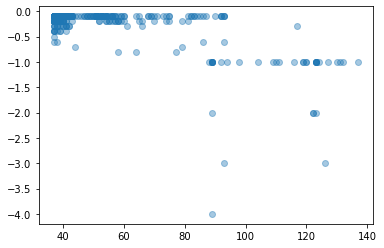

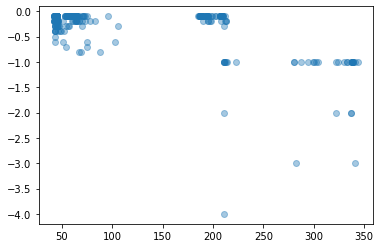

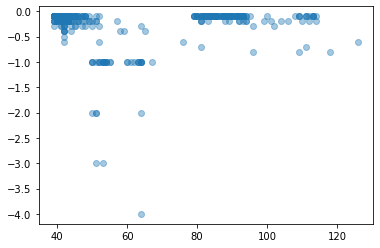

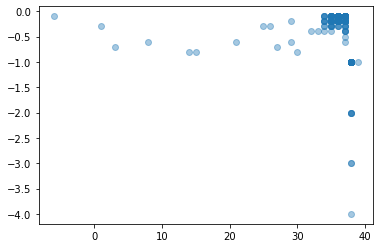

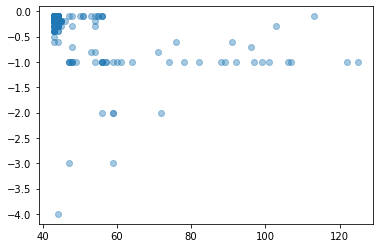

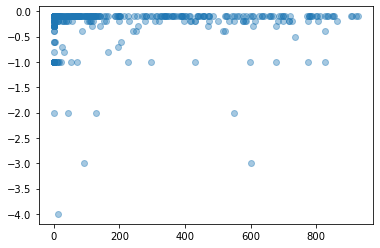

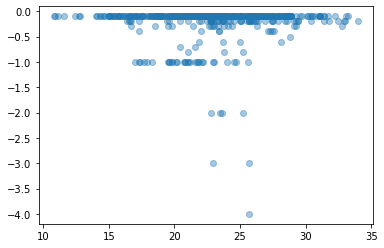

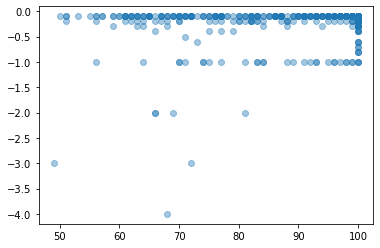

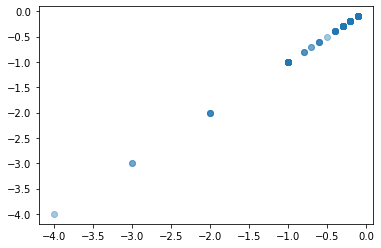

In [24]:
for i in range(9):
    plt.scatter(x_train[:, [i]], y_train, alpha=0.4)
    plt.show()

In [25]:
def compute_loss():
    hypothesis = tf.matmul(x_train, w) + bias
    loss = tf.reduce_mean((hypothesis - y_train) ** 2)
    
    return loss

optimizer = tf.optimizers.Adam(lr = learning_rate)

for step in range(1, trainning_steps + 1):
    optimizer.minimize(compute_loss, var_list = [w, bias])
    
    if step % display_step == 0:
        print('step:', step, '\n', 'w:', '\n', w.numpy(), '\n', 'bias:', bias.numpy(), 
              '\n', 'loss:', compute_loss().numpy(), '\n')
        
        w_pred = w.numpy()

step: 1000 
 w: 
 [[-0.14366469]
 [-0.2501605 ]
 [-0.17236762]
 [ 0.38188598]
 [-0.02140068]
 [ 0.02881661]
 [-0.45354772]
 [ 0.47050062]
 [ 0.8756791 ]] 
 bias: -0.46026462 
 loss: 776.1717 

step: 2000 
 w: 
 [[-0.1317998 ]
 [-0.07813194]
 [-0.18901029]
 [ 0.29286093]
 [-0.07992996]
 [ 0.01173135]
 [-0.52146566]
 [ 0.357131  ]
 [ 0.6783225 ]] 
 bias: -0.54916763 
 loss: 195.4433 

step: 3000 
 w: 
 [[-0.12261701]
 [ 0.02638497]
 [-0.17796403]
 [ 0.22468805]
 [-0.1190261 ]
 [ 0.01174265]
 [-0.56089836]
 [ 0.27022588]
 [ 0.56318074]] 
 bias: -0.61298954 
 loss: 45.467487 

step: 4000 
 w: 
 [[-0.11082585]
 [ 0.05097492]
 [-0.13364837]
 [ 0.18630753]
 [-0.12749228]
 [ 0.01126197]
 [-0.56318575]
 [ 0.2224961 ]
 [ 0.53335106]] 
 bias: -0.6414576 
 loss: 25.296644 

step: 5000 
 w: 
 [[-0.0907556 ]
 [ 0.04186737]
 [-0.0747188 ]
 [ 0.15717426]
 [-0.1181152 ]
 [ 0.01008675]
 [-0.5445375 ]
 [ 0.18496032]
 [ 0.519607  ]] 
 bias: -0.6561532 
 loss: 15.572289 

step: 6000 
 w: 
 [[-0.06075808]
 

In [26]:
y_hat = tf.matmul(x_test, w_pred) + bias

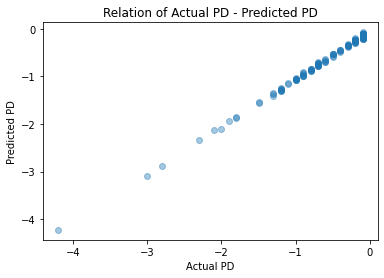

In [27]:
plt.scatter(y_test, y_hat, alpha = 0.4)
plt.xlabel('Actual PD')
plt.ylabel('Predicted PD')
plt.title('Relation of Actual PD - Predicted PD')
plt.show()

In [28]:
def rmse(x_test, y_test):
    y_hat = tf.matmul(x_test, w_pred) + bias
    error = y_hat - y_test
    mse = np.mean(error * error)
    rmse = np.sqrt(mse)
    
    return rmse

print(rmse(x_test, y_test))

0.05777469
